In [6]:
# Import packages
import pandas as pd
import fiona
import geopandas as gpd
import pysal as ps
import sklearn
import sys,os
import matplotlib.pyplot as plt
import mplleaflet
%matplotlib inline
plt.rcParams['figure.figsize'] = [15.00,10.00]
import numpy as np
from shapely.geometry import Polygon
print("Importing packages..")

Importing packages..


In [4]:
#Strava weekend and weekday analysis in April for streets with riders>100
path = "C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Analysis_Generated_Data/"
file1 = pd.read_csv(path + "MAG_Strava_edges_2016_3_weekday_rollup_join_cyclists_100_edges.csv")
file2 = pd.read_csv(path + "MAG_Strava_nodes_2016_3_weekend_rollup_join_cyclists_100_nodes.csv")
file3 = pd.read_csv(path + "MAG_Strava_edges_2016_3_total_rollup_join_cyclists_100_edges.csv")

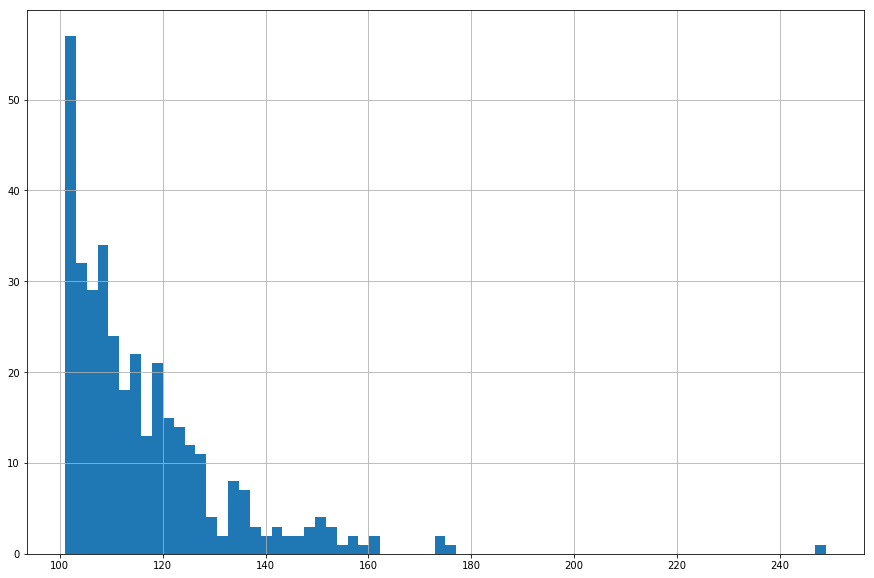

In [7]:
df1 = file1[["edge_id","athlete_count"]].groupby("edge_id").sum()
df1["edge_id"] = df1.index
df1["athlete_count"].hist(bins=70)

In [8]:
#create files for 10-20, 20-50,50-70,70-100,>100 riders in Apr-May & Oct-Nov
apr_tot_rollup_tempe = pd.read_csv(path + "apr_total_strava_merged.csv")

apr_tot_grouped = apr_tot_rollup_tempe[["edge_id","tathcnt"]].groupby("edge_id").sum()
apr_tot_grouped["edge_id"] = apr_tot_grouped.index
apr_tf0_grouped = apr_tot_rollup_tempe[["edge_id","tathcnt_0"]].groupby("edge_id").sum()
apr_tf0_grouped["edge_id"] = apr_tf0_grouped.index
apr_tf1_grouped = apr_tot_rollup_tempe[["edge_id","tathcnt_1"]].groupby("edge_id").sum()
apr_tf1_grouped["edge_id"] = apr_tf1_grouped.index
apr_tf2_grouped = apr_tot_rollup_tempe[["edge_id","tathcnt_2"]].groupby("edge_id").sum()
apr_tf2_grouped["edge_id"] = apr_tf2_grouped.index
apr_tf3_grouped = apr_tot_rollup_tempe[["edge_id","tathcnt_3"]].groupby("edge_id").sum()
apr_tf3_grouped["edge_id"] = apr_tf3_grouped.index
apr_tf4_grouped = apr_tot_rollup_tempe[["edge_id","tathcnt_4"]].groupby("edge_id").sum()
apr_tf4_grouped["edge_id"] = apr_tf4_grouped.index
apr_tf5_grouped = apr_tot_rollup_tempe[["edge_id","tathcnt_5"]].groupby("edge_id").sum()
apr_tf5_grouped["edge_id"] = apr_tf5_grouped.index
apr_tf6_grouped = apr_tot_rollup_tempe[["edge_id","tathcnt_6"]].groupby("edge_id").sum()
apr_tf6_grouped["edge_id"] = apr_tf6_grouped.index
apr_tf7_grouped = apr_tot_rollup_tempe[["edge_id","tathcnt_7"]].groupby("edge_id").sum()
apr_tf7_grouped["edge_id"] = apr_tf7_grouped.index
apr_tf8_grouped = apr_tot_rollup_tempe[["edge_id","tathcnt_8"]].groupby("edge_id").sum()
apr_tf8_grouped["edge_id"] = apr_tf8_grouped.index
apr_tf9_grouped = apr_tot_rollup_tempe[["edge_id","tathcnt_9"]].groupby("edge_id").sum()
apr_tf9_grouped["edge_id"] = apr_tf9_grouped.index

#Interactive plot for peak periods in April
# Identify the edges with most bikers & show the variation at different times of the day
df = apr_tot_grouped.query("tathcnt>20 & tathcnt<50").sort_values(by="tathcnt",ascending =False)
df.head(5)

,tathcnt,edge_id
edge_id,,
895340,49,895340
594923,49,594923
849708,49,849708
854820,49,854820
854823,49,854823


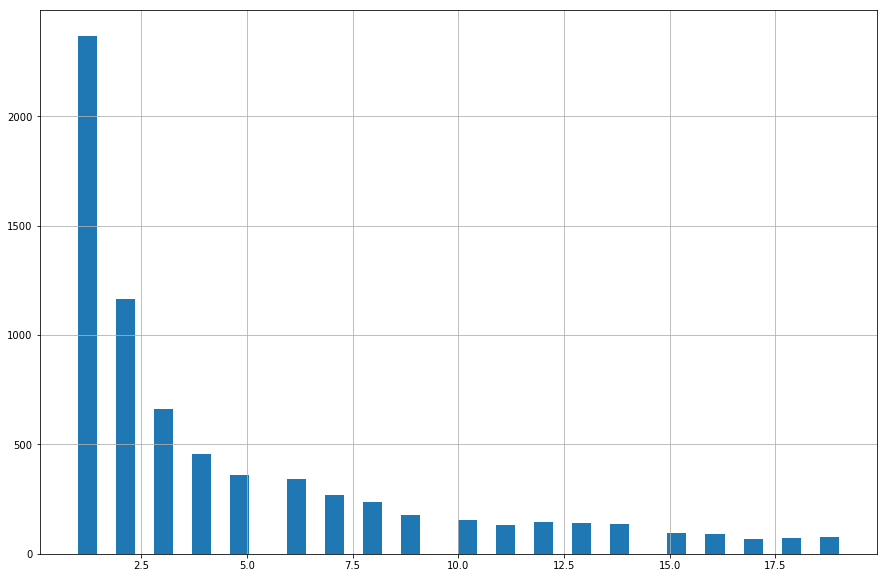

In [9]:
apr_tf0_grouped.query("tathcnt_0>0 & tathcnt_0<20")["tathcnt_0"].hist(bins=40)

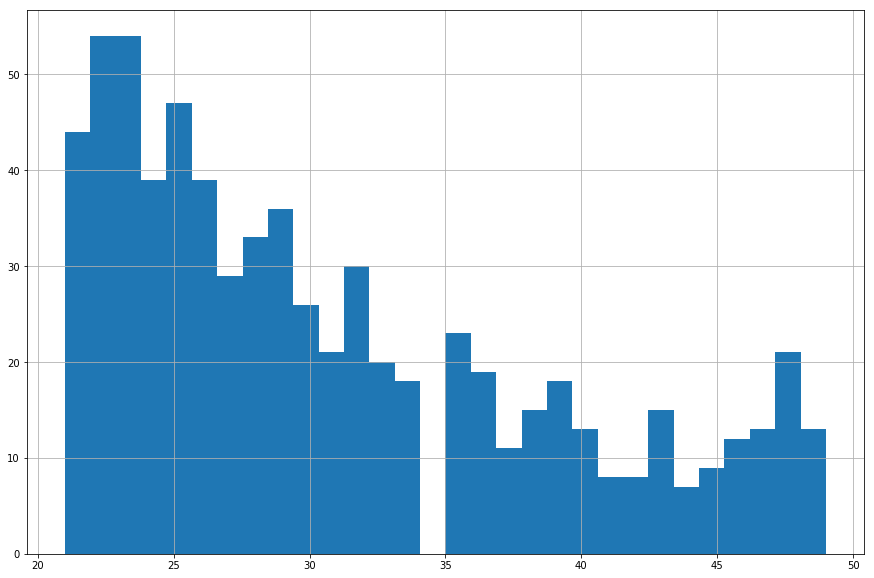

In [10]:
apr_tf0_grouped.query("tathcnt_0>20 & tathcnt_0<50")["tathcnt_0"].hist(bins=30)

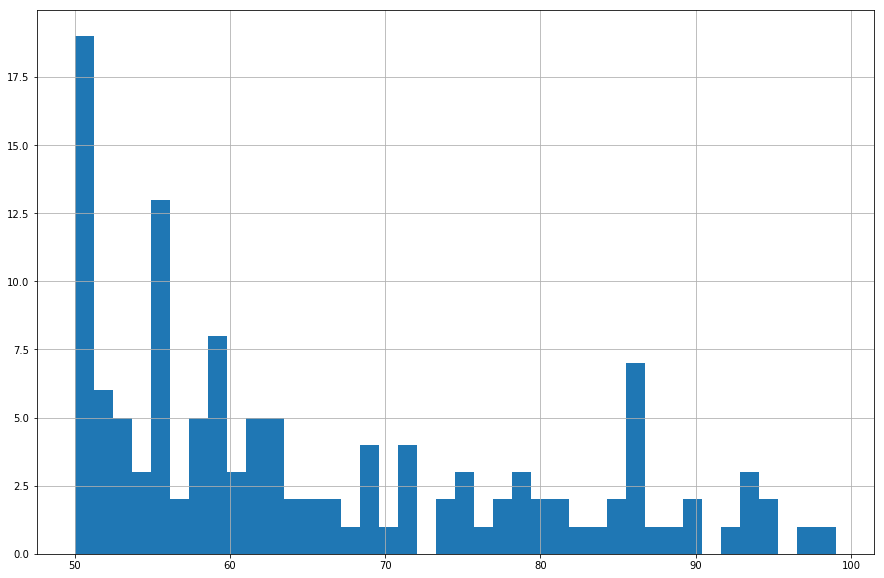

In [11]:
apr_tf0_grouped.query("tathcnt_0>49 & tathcnt_0<100")["tathcnt_0"].hist(bins=40)

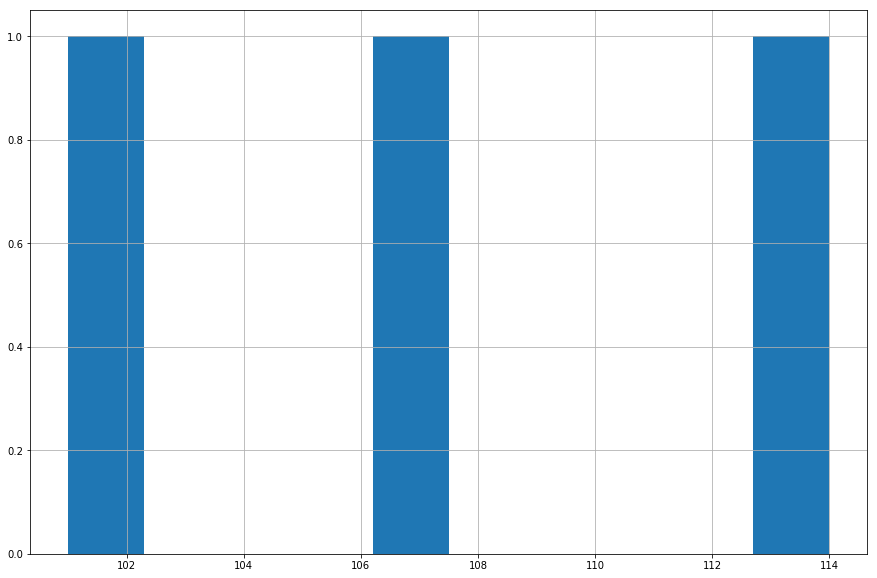

In [12]:
apr_tf0_grouped.query("tathcnt_0>100 & tathcnt_0<200")["tathcnt_0"].hist(bins=10)

In [14]:
# Read april data for tempe by weekday and weekend
path = "C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Analysis_Generated_Data/"
tempe_weekday_rides_apr_edges = pd.read_csv(path + "tempe_weekday_rides_apr_edges.csv")
tempe_weekend_rides_apr_edges = pd.read_csv(path + "tempe_weekend_rides_apr_edges.csv")
tempe_edges_weekday_grouped_sum = pd.read_csv(path +"tempe_apr_bikecounts_grouped_edges_sum.csv")

df1 = tempe_weekday_rides_apr_edges[["KM","actcnt","ractcnt","tathcnt","tactcnt","acttime","racttime","cmtcnt","rcmtcnt","tcmtcnt","speed"]]
df1.corr()

,KM,actcnt,ractcnt,tathcnt,tactcnt,acttime,racttime,cmtcnt,rcmtcnt,tcmtcnt,speed
KM,1.000000,0.023166,-0.001051,0.021168,0.020839,0.718397,0.623881,0.017170,-0.007255,0.008528,0.253132
actcnt,0.023166,1.000000,0.711380,0.919475,0.939661,-0.020934,-0.006730,0.932171,0.680077,0.873703,0.032728
ractcnt,-0.001051,0.711380,1.000000,0.859877,0.903364,-0.018826,-0.023337,0.679891,0.920903,0.843277,-0.011129
tathcnt,0.021168,0.919475,0.859877,1.000000,0.967909,-0.014759,-0.009399,0.818570,0.756476,0.845222,0.009778
tactcnt,0.020839,0.939661,0.903364,0.967909,1.000000,-0.016121,-0.011055,0.890267,0.854372,0.935070,0.018916
acttime,0.718397,-0.020934,-0.018826,-0.014759,-0.016121,1.000000,0.780567,-0.035585,-0.033581,-0.035867,-0.139484
racttime,0.623881,-0.006730,-0.023337,-0.009399,-0.011055,0.780567,1.000000,-0.017992,-0.033196,-0.025624,-0.102645
cmtcnt,0.017170,0.932171,0.679891,0.818570,0.890267,-0.035585,-0.017992,1.000000,0.739659,0.944432,0.065075
rcmtcnt,-0.007255,0.680077,0.920903,0.756476,0.854372,-0.033581,-0.033196,0.739659,1.000000,0.919193,0.021474
tcmtcnt,0.008528,0.873703,0.843277,0.845222,0.935070,-0.035867,-0.025624,0.944432,0.919193,1.000000,0.050507


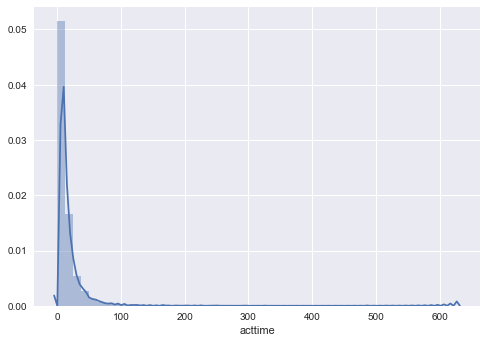

In [15]:
# Plot histogram of duration of activity 
import seaborn as sns
sns.distplot(tempe_weekday_rides_apr_edges["acttime"].dropna())

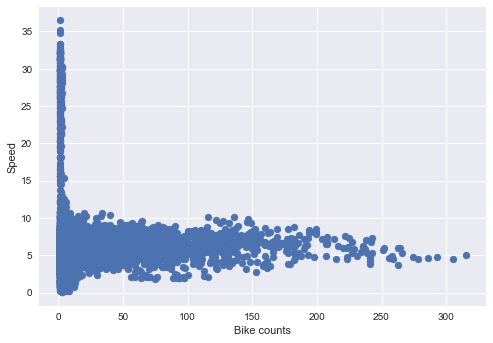

In [16]:
#fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
plt.scatter(tempe_weekday_rides_apr_edges["tathcnt"],tempe_weekday_rides_apr_edges["speed"])
plt.xlabel("Bike counts")
plt.ylabel("Speed")

In [33]:
df1 = tempe_weekday_rides_apr_edges.query("OSM_NAME=='East Apache Boulevard'")
df2 = tempe_weekday_rides_apr_edges.query("OSM_NAME=='East University Drive'")

#Plot a time series for April weekday
path = "C:/Users/aroy29/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Analysis_Generated_Data/"
apr_min_by_min_tempe = pd.read_csv(path + "apr_tempe_min_by_min.csv")

df1_merged = df1[["ID","OSM_NAME","speed"]].merge(apr_min_by_min_tempe,left_on="ID",right_on="edge_id")
df2_merged = df2[["ID","OSM_NAME","speed"]].merge(apr_min_by_min_tempe,left_on="ID",right_on="edge_id")
df1_merged.drop(df1_merged.columns[[3,4,5]], axis=1, inplace=True)
df2_merged.drop(df1_merged.columns[[3,4,5]], axis=1, inplace=True)

In [38]:
df1_merged.head()

,ID,OSM_NAME_x,speed,athcnt_0,rathcnt_0,actcnt_0,ractcnt_0,tathcnt_0,tactcnt_0,acttime_0,...,hour,minute,athlete_count,rev_athlete_count,activity_count,rev_activity_count,total_activity_count,activity_time,rev_activity_time,commute_count
0,686734,East Apache Boulevard,6.026993,22,5,45,5,26,50,19.996461,...,14,14,0,1,0,1,1,NaN,23.059121,0
1,686734,East Apache Boulevard,6.026993,22,5,45,5,26,50,19.996461,...,15,42,0,1,0,1,1,NaN,13.385935,0
2,686734,East Apache Boulevard,6.026993,22,5,45,5,26,50,19.996461,...,8,18,1,0,1,0,1,17.215307,NaN,0
3,686734,East Apache Boulevard,6.026993,22,5,45,5,26,50,19.996461,...,13,18,2,0,2,0,2,22.766659,NaN,1
4,686734,East Apache Boulevard,6.026993,22,5,45,5,26,50,19.996461,...,14,32,0,1,0,1,1,NaN,18.539911,0


In [39]:
def day_to_mm(x):
    month = 0
    if (x in np.arange(1,32)):
        month = 1
    elif (x in np.arange(32,61)):
         month = 2
    elif (x in np.arange(61,92)):
         month = 3
    elif (x in np.arange(92,123)):
        month = 4
    elif (x in np.arange(123,153)):
        month = 5
    elif(x in np.arange(153,183)):
        month = 6
    elif(x in range(183,214)):
        month = 7
    elif(x in range(214,245)):
        month = 8
    elif(x in range(245,275)):
        month = 9
    elif(x in range(275,306)):
        month = 10
    elif(x in range(306,336)):
        month = 11
    elif(x in range (336,367)):
        month = 12
    return month

def day_to_dd(x):
    date = 0
    if (x in np.arange(1,32)):
        date = x
    elif (x in np.arange(32,61)):
        date = x-31
    elif (x in range(61,92)):
        date = x-60
    elif (x in range(92,123)):
        date = x-91
    elif (x in range(123,153)):
        date = x-121
    elif(x in range(153,183)):
        date = x - 152
    elif(x in range(183,214)):
        date = x - 182
    elif(x in range(214,245)):
        date = x - 213
    elif(x in range(245,275)):
        date = x - 244
    elif(x in range(275,306)):
        date = x - 274
    elif(x in range(306,336)):
        date = x - 305
    elif(x in range (336,367)):
        date = x - 335
    return date

month1,date1,month2,date2 = [],[],[],[]
month1 = df1_merged["day"].apply(lambda x: day_to_mm(int(x)))
date1 = df1_merged["day"].apply(lambda x: day_to_dd(int(x)))
df1_merged['month'] = month1
df1_merged['date'] = date1
month2 = df2_merged["day"].apply(lambda x: day_to_mm(int(x)))
date2 = df2_merged["day"].apply(lambda x: day_to_dd(int(x)))
df2_merged['month'] = month2
df2_merged['date'] = date2

In [43]:
apr_weekday_east_uni[["ID","year","month","day","hour","minute","tathcnt","speed"]].head()

,ID,year,month,day,hour,minute,tathcnt,speed
144,896752,2016,4,92,10,49,38,6.548015
145,896752,2016,4,92,14,33,38,6.548015
146,896752,2016,4,92,21,5,38,6.548015
147,896752,2016,4,92,13,51,38,6.548015
148,896752,2016,4,93,0,6,38,6.548015


In [49]:
apr_weekday_east_uni.columns[120:]

Index([u'racttime', u'cmtcnt', u'rcmtcnt', u'tcmtcnt', u'ID_x', u'OSM_ID',
       u'OSM_NAME_y', u'OSM_META', u'OSM_SOURCE', u'OSM_TARGET', u'CLAZZ',
       u'FLAGS', u'SOURCE', u'TARGET', u'KM', u'KMH', u'COST', u'REVERSE_CO',
       u'X1', u'Y1', u'X2', u'Y2', u'geometry', u'Unnamed: 0_y', u'ID_y',
       u'year', u'day', u'hour', u'minute', u'athlete_count',
       u'rev_athlete_count', u'activity_count', u'rev_activity_count',
       u'total_activity_count', u'activity_time', u'rev_activity_time',
       u'commute_count', u'month', u'date'],
      dtype='object')

In [74]:
type(apr_weekday_apache["day"][554])

numpy.int64

In [51]:
apr_weekday_apache = df1_merged.query("day>91 & day<123")
apr_weekday_east_uni = df2_merged.query("day>91 & day<123")
apache_date = apr_weekday_apache[["year","month","day","hour","minute"]]
apr_weekday_apache["timestamp"] = pd.to_datetime(apache_date)
eastuni_date = apr_weekday_east_uni[["year","month","day","hour","minute"]]
apr_weekday_east_uni["timestamp"] = pd.to_datetime(eastuni_date)

ValueError: cannot assemble the datetimes: 'long' object is unsliceable

In [ ]:
tempe_apr_edges_peak_counts_weekdays = tempe_weekday_rides_apr_edges[["ID","tathcnt_0","tathcnt_1","tathcnt_2","tathcnt_3","tathcnt_4","tathcnt_5","tathcnt_6","tathcnt_7","tathcnt_8","tathcnt_9","tathcnt"]].groupby("ID").sum()
tempe_apr_edges_peak_counts_weekdays["ID"] = tempe_apr_edges_peak_counts_weekdays.index
tempe_apr_edges_peak_counts_weekends = tempe_weekend_rides_apr_edges[["ID","tathcnt_0","tathcnt_1","tathcnt_2","tathcnt_3","tathcnt_4","tathcnt_5","tathcnt_6","tathcnt_7","tathcnt_8","tathcnt_9","tathcnt"]].groupby("ID").sum()
tempe_apr_edges_peak_counts_weekends["ID"] = tempe_apr_edges_peak_counts_weekends.index

In [ ]:
tempe_apr_edges_peak_counts_weekdays.query("tathcnt>20 & tathcnt<50").sort_values(by="tathcnt",ascending=False)

In [ ]:
tempe_edges_strava = gpd.read_file("Tempe shapefiles/Tempe_edges_zipcodes.shp")
df = tempe_edges_strava[tempe_edges_strava["ID"].isin([45557,883829,115,584570,
                                                       882072,896162,881025,882060,
                                                       710023,627830,45558,94910,
                                                       700148,427440,882039,892562,
                                                       896013,376702,625146,895899,
                                                       480141,882801,882089,584571,
                                                       882808,854809])]
tempe_streets_apr_peak = df[["ID","OSM_NAME"]]
tempe_streets_apr_peak
#854809,854809,710023,881025,882089

In [ ]:
fig = df.plot()
import mplleaflet as mpl
mpl.display()

In [ ]:
# Plot timeseries variation of bike rides along the "East University Drive" and "East Apache Boulevard" in April 
tempe_min_by_min_edges = gpd.read_file("/Users/avipsaroy/Dropbox (ASU)/Strava Analysis/Data/MAG2016/maricopa_2016_ride/Analysis_Generated_Data/Tempe_min_by_min_data.shp")
tempe_min_by_min_edges.head()

In [ ]:
"""y = []
def str_to_int(x):
    for item in x:
        if item == '':
            item = '0'
        y.append(int(item))
    return y
maricopa_int = str_to_int(tempe_min_by_min_edges["maricopa_1"])
tempe_min_by_min_edges["maricopa_1"] = maricopa_int"""
tempe_apr_min_by_min = tempe_min_by_min_edges.query("maricopa_1>=92 & maricopa_1<=122")
#east_uni_drive_apr_min = tempe_apr_min_by_min.query("OSM_NAME=='East University Drive'
fig = tempe_apr_min_by_min.plot()
mplleaflet.display()

In [ ]:
datetime = pd.to_datetime(timestamp '2015-12-31' + interval '1 day' * day +
interval '1 hour' * hour + interval '1 minute' * minute as timestamp)